In [1]:
import pickle
import pandas as pd

from main import exp1, exp6
from utils.plotting import compare_training_histories, plot_training_history, compare_accuracies

In [2]:
# global variables
RUN_EXP = False

# Experiment 1: Model Initialization
First of all, experiment with initializing your model weights in a few different ways. Create several MLPs with a single hidden layer having 128 units, initializing the weights as (1) all zeros (2) Uniform [-1, 1] (3) Gaussian N(0,1) (4) Xavier (5) Kaiming. After training these models, compare the effect of weight initialization on the training curves and test accuracy on the Fashion MNIST dataset.

In [3]:
optimizer_kwargs = {
    'lr': 0.01, 
    'decay': 1e-6, 
    'momentum': 0.9,
    'regularization': 'l2',
    'lambd': 0.001
    }
optimizer = 'SGD'
batch_size = 256
epochs = 100

#histories, final_accuracies = exp1(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

Final accuracies:
Model 1: ('Zeros', 0.1, 0.1)
Model 2: ('Uniform', 0.9111333333333334, 0.8815)
Model 3: ('Gaussian', 0.9050333333333334, 0.8778)
Model 4: ('Xavier', 0.9144333333333333, 0.881)
Model 5: ('Kaiming', 0.9174166666666667, 0.8818)


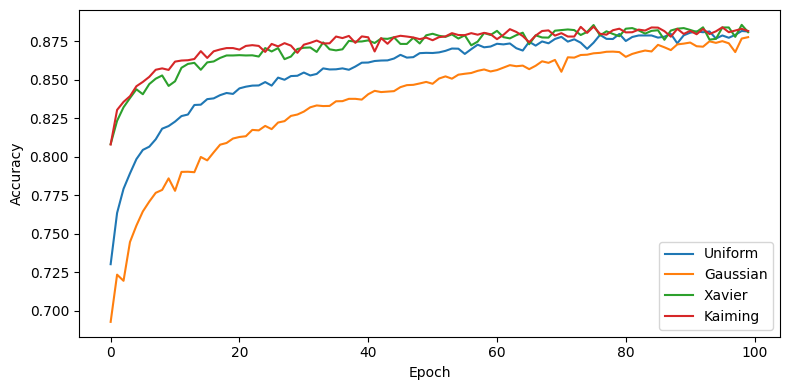

In [4]:
histories = pickle.load(open('out/exp1/histories.pickle', 'rb'))
final_accuracies = pickle.load(open('out/exp1/final_accuracies.pickle', 'rb'))
titles = ['Zeros', 'Uniform', 'Gaussian', 'Xavier', 'Kaiming']

print('Final accuracies:')
for i, acc in enumerate(final_accuracies):
    print('Model {}: {}'.format(i+1, acc))

# plots
#compare_training_histories(histories, titles, show=True)
#plot_training_history(histories[4], title=titles[4], show=True)
compare_accuracies(histories[1:], titles[1:], figsize=(8,4), plot_train=False, show=True)

# Experiment 2: Hidden Layers
Create three different models: 
1. an MLP with no hidden layers, i.e., it directly maps the inputs to outputs,
2. an MLP with a single hidden layer having 128 units and ReLU activations,
3. an MLP with 2 hidden layers each having 128 units with ReLU activations. 

It should be noted that since we want to perform classification, all of these models should have a softmax layer at the end. After training, compare the test accuracy of these three models on the Fashion MNIST dataset. Comment on how non-linearity and network depth affects the accuracy. Are the results that you obtain expected?


In [5]:
# TODO

# Experiment 3: Activation Function

Take the last model above, the one with 2 hidden layers, and create two different copies of it in which you pick two activations of your choice (except ReLU) from the course slides. After training these two models on Fashion MNIST compare their test accuracies with the model with ReLU activations. Comment on the performances of these models: which one is better and why? Are certain activations better than others? If the results are not as you expected, what could be the reason?

In [6]:
# TODO

# Experiment 4: Regularization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, independently add L1 and L2 regularization to the network and train the MLP in this way. How do these regularizations affect the accuracy? (This proportion can be varied as a tunable hyperparameter that can be explored as part of other project requirements)

In [7]:
# TODO

# Experiment 5: Data Normalization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, train it with unnormalized images. How does this affect the accuracy?

In [8]:
# TODO

# Experiment 6: Convolutional Neural Networks
Using PyTorch, create a convolutional neural network (CNN) with 2 convolutional and 2 fully connected layers. Although you are free in your choice of the hyperparameters of the convolutional layers, set the number of units in the fully connected layers to be 128. Also, set the activations in all of the layers to be ReLU. Train this CNN on the Fashion MNIST dataset. Does using a CNN increase/decrease the accuracy compared to using MLPs? Provide comments on your results.


## Param Grid Search

We performed a grid search for the following parameters and design choices:
```python
param_grid = {
    'conv1_out': [16, 32],          # number of output channels for conv1
    'conv2_out': [32, 64],          # number of output channels for conv2
    'stride': [1],                  # stride for conv1 and conv2 (set to 1 as images are small)
    'kernel_size': [3, 5],          # kernel size for conv1 and conv2
    'padding': [1, 2],              # padding for conv1 and conv2
    'optimizer': ['SGD'],           # optimizer
    'lr': [0.001, 0.01],            # learning rate
    'batch_size': [16, 32, 64],     # batch size
    'epochs': [5]                   # number of epochs (if less are better, can still be observed)
}
```

Furthermore the following parameters were fixed:
```python
momentum = 0.9
```


In [9]:
grid_search_results = pd.read_csv('out/exp6/grid_search/grid_search_results.csv')

# sort by test accuracy 
grid_search_results.sort_values(by='final_accuracy', ascending=False, inplace=True)

# tighten table
grid_search_results.drop(columns=['optimizer'], inplace=True)
grid_search_results.rename(columns={'final_accuracy': 'test_acc'}, inplace=True)
grid_search_results.rename(columns={'kernel_size': 'kernel'}, inplace=True)
grid_search_results.rename(columns={'batch_size': 'bs'}, inplace=True)

# print top 10
print(grid_search_results.head(20))

    conv1_out  conv2_out  stride  kernel  padding    lr  bs  epochs  test_acc
81         32         64       1       3        2  0.01  16       5    0.9161
75         32         64       1       3        1  0.01  16       5    0.9145
76         32         64       1       3        1  0.01  32       5    0.9135
94         32         64       1       5        2  0.01  32       5    0.9134
40         16         64       1       5        1  0.01  32       5    0.9132
52         32         32       1       3        1  0.01  32       5    0.9131
34         16         64       1       3        2  0.01  32       5    0.9129
58         32         32       1       3        2  0.01  32       5    0.9128
22         16         32       1       5        2  0.01  32       5    0.9127
71         32         32       1       5        2  0.01  64       5    0.9119
46         16         64       1       5        2  0.01  32       5    0.9118
57         32         32       1       3        2  0.01  16     

## Run Experiment

In [10]:


RUN_EXP = True

if RUN_EXP:
    # extract best params from dataframe
    best_params = grid_search_results.iloc[0].to_dict()
    optimizer_kwargs = {
        'lr': best_params['lr'], 
        'momentum': 0.9,
        }
    conv1_out = int(best_params['conv1_out'])
    conv2_out = int(best_params['conv2_out'])
    stride = int(best_params['stride'])
    kernel = int(best_params['kernel'])
    padding = int(best_params['padding'])
    batch_size = int(best_params['bs'])
    #epochs = int(best_params['epochs'])
    epochs = 1
    optimizer = 'SGD'
    exp6_history, exp6_final_accuracy = exp6(optimizer_kwargs, conv1_out=conv1_out, conv2_out=conv2_out, 
                                   stride=stride, kernel=kernel, padding=padding, 
                                   epochs=epochs, batch_size=batch_size, verbose=True)
else:
    exp6_history = pickle.load(open('out/exp6/history.pickle', 'rb'))
    exp6_final_accuracy = pickle.load(open('out/exp6/final_accuracy.pickle', 'rb'))

Epoch 1/5: Train Loss=0.4240, Train Acc=0.8435, Test Loss=0.0214, Test Acc=0.8711


KeyboardInterrupt: 

## Results

Final accuracy: 0.9069


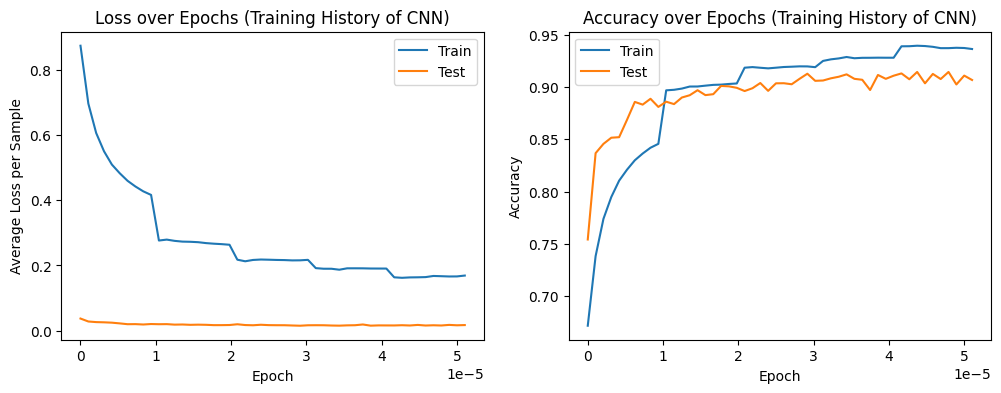

In [ ]:
## training history
print('Final accuracy: {}'.format(exp6_final_accuracy))
plot_training_history(exp6_history, num_batches_per_epoch=(60000*batch_size), title='Training History of CNN', show=True)

# Experiment 7: CIFAR-10
ow using the CIFAR-10 dataset, train an MLP using your implementation (with whatever layer dimensions you like), and a CNN with the same architecture restrictions as in (6). How does using a CNN increase/decrease the accuracy compared to using MLPs on this dataset?


In [ ]:
# TODO

# Experiment 8: Optimizer
In your CNN implemented with PyTorch, investigate the effects of optimizer on performance on the CIFAR- 10 dataset. Using an SGD optimizer, set the momentum factor to zero, and then try to increase it. How does changing this value impact the training and performance of the network in terms of convergence speed, final accuracy, and stability? How do these compare if you instead use an Adam optimizer?

In [ ]:
# TODO

# Experiment 9: Pre-trained Model
(BONUS: Counts for open-ended marks) Load a pre-trained model that you see fit (e.g., a ResNet) using Py- Torch, and then freeze all the convolutional layers and remove all the fully connected ones. Add a number of fully connected layers of your choice right after the convolutional layers. Train only the fully connected layers of the pre-trained model on the CIFAR-10 dataset. How does this pre-trained model compare to the best MLP in part 1 and to the regular CNN in part 5 in terms of the accuracy? How does it compare to the previous models in terms of the required training time? Justify your choice of how many fully connected layers that you have added to the pre-trained model through careful experiments.

In [ ]:
# TODO